BloomTech Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

## Assignment

Complete these tasks for your assignment/project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. Review requirements for your portfolio project on Canvas, and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

Target  = SALE PRICE


My problem is regression


In [58]:
data = "C:/Users/ISHMO_CT/Downloads/Bloomtech/NW_C_price/dataset/NYC_Citywide_Rolling_Calendar_Sales_20240306.csv"

In [59]:
import pandas as pd
import numpy as np

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

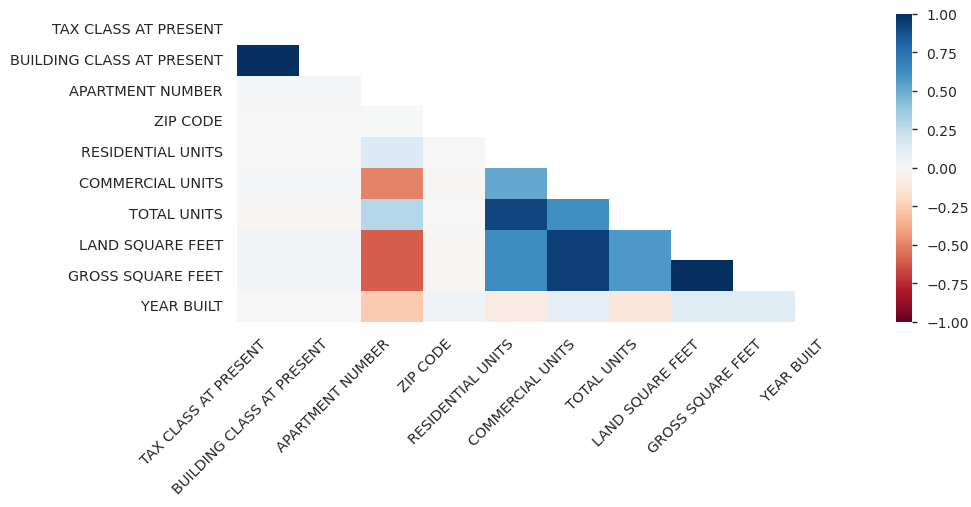

In [91]:
from ydata_profiling import ProfileReport
report = ProfileReport(df)
report.to_notebook_iframe()

In [61]:
# # Finding out if there are outliers
# import matplotlib.pyplot as plt
# plt.scatter(df['GROSS SQUARE FEET'], df['SALE PRICE'])
# plt.xlabel('GSF')
# plt.ylabel('Price')
# plt.show()

### Wrangle and analyse data

In [173]:
def wrangle(filepath):
    # Reading the file
    df = pd.read_csv(filepath)

    # Setting the date to the date time object
    df["SALE DATE"] = pd.to_datetime(df["SALE DATE"])

    # refining the Sale date to an index column
    df.set_index('SALE DATE', inplace=True)

    #dropping null values
    df.dropna(axis=0, how="any")

    #Try dropping high cardinality columns
    threshold = 50
    cols_to_drop = [col for col in df.select_dtypes('object') if df[col].nunique() > threshold]
    df.drop(columns=cols_to_drop, inplace=True) 

    return df

In [174]:
df = wrangle(data)
df.head()

BOROUGH  BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  LOT  \
SALE DATE                                                                       
2023-04-18        2  01 ONE FAMILY DWELLINGS                    1   3030   66   
2023-08-23        2  01 ONE FAMILY DWELLINGS                    1   3030   66   
2023-04-14        2  01 ONE FAMILY DWELLINGS                    1   3035   52   
2023-10-24        2  01 ONE FAMILY DWELLINGS                    1   3053   86   
2023-06-26        2  02 TWO FAMILY DWELLINGS                    1   2904   22   

            EASE-MENT  ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  \
SALE DATE                                                              
2023-04-18        NaN   10457.0                1.0               0.0   
2023-08-23        NaN   10457.0                1.0               0.0   
2023-04-14        NaN   10457.0                1.0               0.0   
2023-10-24        NaN   10458.0                1.0               2.0   
2023-06-26        NaN   10457.0                2.0               0.0   

            TOTAL UNITS  GROSS SQUARE FEET  YEAR BUILT  \
SALE DATE                                                
2023-04-18          1.0             1497.0      1899.0   
2023-08-23          1.0             1497.0      1899.0   
2023-04-14          1.0             1548.0      1899.0   
2023-10-24          3.0             4080.0      1931.0   
2023-06-26          2.0             1428.0      1901.0   

            TAX CLASS AT TIME OF SALE  SALE PRICE  
SALE DATE                                          
2023-04-18                          1      215000  
2023-08-23                          1      570000  
2023-04-14                          1           0  
2023-10-24                          1           0  
2023-06-26                          1      350000

In [168]:
df['BUILDING CLASS CATEGORY'].unique()

array(['01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS',
       '03 THREE FAMILY DWELLINGS', '05 TAX CLASS 1 VACANT LAND',
       '07 RENTALS - WALKUP APARTMENTS', '10 COOPS - ELEVATOR APARTMENTS',
       '22 STORE BUILDINGS', '27 FACTORIES', '29 COMMERCIAL GARAGES',
       '30 WAREHOUSES', '31 COMMERCIAL VACANT LAND',
       '04 TAX CLASS 1 CONDOS', '08 RENTALS - ELEVATOR APARTMENTS',
       '33 EDUCATIONAL FACILITIES', '09 COOPS - WALKUP APARTMENTS',
       '14 RENTALS - 4-10 UNIT', '32 HOSPITAL AND HEALTH FACILITIES',
       '37 RELIGIOUS FACILITIES', '41 TAX CLASS 4 - OTHER',
       '06 TAX CLASS 1 - OTHER', '13 CONDOS - ELEVATOR APARTMENTS',
       '12 CONDOS - WALKUP APARTMENTS', '44 CONDO PARKING',
       '35 INDOOR PUBLIC AND CULTURAL FACILITIES',
       '36 OUTDOOR RECREATIONAL FACILITIES', '28 COMMERCIAL CONDOS',
       '21 OFFICE BUILDINGS', '26 OTHER HOTELS',
       '11 SPECIAL CONDO BILLING LOTS', '17 CONDO COOPS',
       '43 CONDO OFFICE BUILDINGS', '46 CONDO STORE BU

### SPLIT DATA

In [121]:
## Wrangle and analyse data
target  = 'SALE PRICE'
y = df[target]
X = df.drop(columns=target)


In [122]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) 

### Baseline 

We are using mean absolute error

In [97]:
from sklearn.metrics import mean_absolute_error

y_train_pred = [y_train.mean()] * len(y_train)
Baseline = mean_absolute_error(y_train, y_train_pred)
print("Baseline using mean absolute error is", Baseline)

Baseline using mean absolute error is 1395805.3498567955


### Create a model using linear regression

In [99]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=False),
    StandardScaler(),
    SimpleImputer(),
    LinearRegression()
)

model_lr.fit(X_train, y_train)

C:\Users\ISHMO_CT\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\ISHMO_CT\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\ISHMO_CT\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
C:\Users\ISHMO_CT\AppData\Roaming\Python\Python311\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: [58]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['BUILDING CLASS CATEGORY',
                                     'TAX CLASS AT PRESENT'])),
                ('standardscaler', StandardScaler()),
                ('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

#### Check the baseline

In [100]:
y_val_pred = model_lr.predict(X_val)
model_lr_val_mae = mean_absolute_error(y_val, y_val_pred)
print("Baseline:", model_lr_val_mae)

C:\Users\ISHMO_CT\AppData\Roaming\Python\Python311\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: [58]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Baseline: 1327451.6838182902


## Baseline explanation

After fiiting our model with liener regression, the baseline decreased i.e the mean absolute error decressed thus shwing an improvement in the prediction

#### Lets try XGBOSST

In [186]:
from xgboost import XGBRegressor
from category_encoders import OrdinalEncoder
model_xgb = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    XGBRegressor(random_state = 42, n_jobs=-1, n_enstimator = 75)
)

model_xgb.fit(X_train, y_train)

C:\Users\ISHMO_CT\AppData\Roaming\Python\Python311\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['EASE-MENT']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\ISHMO_CT\.conda\envs\Kaggle_proj\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:37:54] WARNING: D:\bld\xgboost-split_1705650032250\work\src\learner.cc:742: 
Parameters: { "n_enstimator" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
                                      'TAX CLASS AT PRESENT',
                                      'BUILDING CLASS AT PRESENT', 'ADDRESS',
                                      'APARTMENT NUMBER', 'LAND SQUARE FEET',
                                      'BUILDING CLASS AT TIME OF SALE'],
                                mapping=[{'col': 'NEIGHBORHOOD',
                                          'data_type': dtype('O'),
                                          'mapping': MORRISANIA/LONGWOOD        1
NEW SPRINGVILLE            2
BOROUGH PARK               3
MURRAY HILL                4
FINANCIAL                  5
                        ... 
BR...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_enstimator=75, n_estimators=None, n_jobs=-1,
                              num_parallel_tree=None, ...))])

### Calculate the baseline of the xgb model

In [176]:
y_val_pred_xgb = model_xgb.predict(X_val)
baseline = mean_absolute_error(y_val, y_val_pred_xgb)
print("Baseline:", baseline)

Baseline: 1558150.198232025


C:\Users\ISHMO_CT\AppData\Roaming\Python\Python311\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['EASE-MENT']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


### Let's find out the model permutation importances

In [177]:
transformed_column_names = model_xgb.named_steps['ordinalencoder'].get_feature_names_out(['ordinal_column'])

# Display the transformed column names
print("Transformed column names:", transformed_column_names)

Transformed column names: ['BOROUGH' 'NEIGHBORHOOD' 'BUILDING CLASS CATEGORY' 'TAX CLASS AT PRESENT'
 'BLOCK' 'LOT' 'EASE-MENT' 'BUILDING CLASS AT PRESENT' 'ADDRESS'
 'APARTMENT NUMBER' 'ZIP CODE' 'RESIDENTIAL UNITS' 'COMMERCIAL UNITS'
 'TOTAL UNITS' 'LAND SQUARE FEET' 'GROSS SQUARE FEET' 'YEAR BUILT'
 'TAX CLASS AT TIME OF SALE' 'BUILDING CLASS AT TIME OF SALE']


In [178]:
import matplotlib.pyplot as plt
importances = model_xgb.named_steps['xgbregressor'].feature_importances_ 
importances

array([0.04743817, 0.04968008, 0.06185056, 0.02057368, 0.06806968,
       0.04253877, 0.06319675, 0.06941953, 0.01854269, 0.04192293,
       0.05295156, 0.07059723, 0.04014797, 0.0351905 , 0.07396556,
       0.08499639, 0.06592963, 0.09298833], dtype=float32)

In [181]:
X_train.columns.value_counts().sum()

19

In [156]:
import matplotlib.pyplot as plt
importances = model_xgb.named_steps['xgbregressor'].feature_importances_ 
feature_names = X_train.columns


feat_imp = pd.Series(data = importances, index=feature_names).sort_values()
feat_imp.plot(kind='barh')
plt.xlabel('Gini importance')
plt.ylabel('features')

ValueError: Length of values (18) does not match length of index (19)